<a href="https://colab.research.google.com/github/Anjali001/Text_Summarisation_SNLP/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imprt packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

#import dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# WikiHow = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/wikihowAll.csv')
# WikiHow = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/WikiHow_withlength.csv')

WikiHow = pd.read_csv('/content/gdrive/MyDrive/SNLP_Coursework/wikihowAll.csv')

#clean dataset
#Some questions do not have text so the column 'text' is NaN
#Replace these with ''
WikiHow.fillna('', inplace=True)

# galance of dataframe
WikiHow.head()

Mounted at /content/gdrive


,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [ ]:
#generate a column storing the length of each passage
WikiHow['text_length'] = 'empty'
for i, text in enumerate(WikiHow['text']):
  # print(i, len(text.split()))
  WikiHow['text_length'][i] = len(text.split())

In [ ]:
#save the dataset with passage length
WikiHow.to_csv('WikiHow_withlength.csv')
!cp WikiHow_withlength.csv "/content/gdrive/My Drive/SNLP_Coursework"

In [ ]:
#reomove passages with length less than 30 and passages length that only appear once
WikiHow_removed = WikiHow[WikiHow['text_length']>30][WikiHow[WikiHow['text_length']>30].duplicated(subset=["text_length"], keep=False)]

In [ ]:
#apply stratified sampling to the dataset
N = round(len(WikiHow_removed)/2)
WikiHow_sample = WikiHow_removed.groupby('text_length', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(WikiHow_removed))))).sample(frac=1).reset_index(drop=True)

WikiHow_sample.to_csv('WikiHow_sample.csv')
!cp WikiHow_sample.csv "/content/gdrive/My Drive/SNLP_Coursework"

In [ ]:
WikiHow_sample_in1024 = WikiHow_sample[(WikiHow_sample['text_length']>512) & (WikiHow_sample['text_length']<1024)]
WikiHow_sample_in1024.reset_index(drop=True, inplace=True)

WikiHow_sample_in1024.to_csv('WikiHow_sample_in1024.csv')
!cp WikiHow_sample_in1024.csv "/content/gdrive/My Drive/SNLP_Coursework"

In [ ]:
WikiHow_sample_in2048 = WikiHow_sample[(WikiHow_sample['text_length']>1024) & (WikiHow_sample['text_length']<2048)]
WikiHow_sample_in2048.reset_index(drop=True, inplace=True)

WikiHow_sample_in2048.to_csv('WikiHow_sample_in2048.csv')
!cp WikiHow_sample_in2048.csv "/content/gdrive/My Drive/SNLP_Coursework"

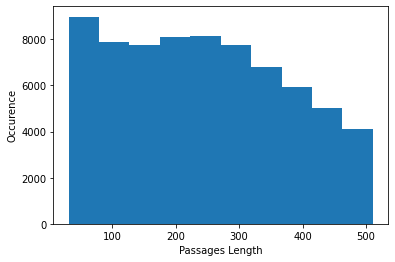

In [ ]:
#plot the distribution of our test dataset
plt.hist(WikiHow_sample_leq512['text_length'])
plt.xlabel('Passages Length')
plt.ylabel('Occurence')
plt.plot()
plt.savefig('sample_distribution.png')